In [76]:
%matplotlib inline
import numpy as np
import h5py
from sklearn import cross_validation, neighbors, metrics
import matplotlib.pyplot as plt

In [77]:
h5file = h5py.File("./knnClassify3c.mat", "r")  # this data can be downloaded from pmtk3 repository

In [78]:
X_train = np.array(h5file["Xtrain"]).T
X_test = np.array(h5file["Xtest"]).T
y_train = np.array(h5file["ytrain"]).ravel()
y_test = np.array(h5file["ytest"]).ravel()

In [79]:
ks = np.array([1, 5, 10, 20, 50, 100, 120])

In [80]:
n_folds = 5
N_train = X_train.shape[0]
np.random.seed(0)
cv = cross_validation.KFold(N_train, n_folds, shuffle=True)
cv_err_result = []
test_err_result = []
for k in ks:
    cv_err_rates = []
    for train_index, test_index in cv:
        X_cv_train = X_train[train_index]
        X_cv_test = X_train[test_index]
        y_cv_train = y_train[train_index]
        y_cv_test = y_train[test_index]
        cv_model = neighbors.KNeighborsClassifier(n_neighbors=k)
        cv_model.fit(X_cv_train, y_cv_train)
        y_cv_pred = cv_model.predict(X_cv_test)
        err = 1 - metrics.accuracy_score(y_cv_test, y_cv_pred)
        cv_err_rates.append(err)
    cv_err_mean = np.mean(cv_err_rates)
    cv_err_result.append(cv_err_mean)
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_err = 1 - metrics.accuracy_score(y_test, y_pred)
    test_err_result.append(test_err)

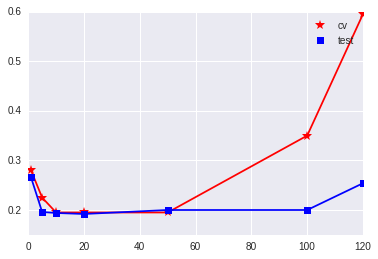

In [81]:
p1, = plt.plot(ks, cv_err_result, "r*", markersize=10)
plt.plot(ks, cv_err_result, "r")
p2, = plt.plot(ks, test_err_result, "bs")
plt.plot(ks, test_err_result, "b")
plt.legend([p1, p2], ["cv", "test"])